In [1]:
import cv2
import tensorflow as tf
import numpy as np


# Step 3: Define the function to extract frames and store them in a list
def extract_frames_to_list(video_path, fps=10):
    # Load the video
    cap = cv2.VideoCapture(video_path)
    
    # Get the original frame rate of the video
    original_fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Calculate the interval between frames to capture
    frame_interval = int(original_fps / fps)
    
    # Initialize a list to store frames
    frames = []
    frame_count = 0
    
    while True:
        # Read a frame
        ret, frame = cap.read()
        
        # If the frame was not retrieved, break the loop
        if not ret:
            break
        
        # Capture only every `frame_interval` frame
        if frame_count % frame_interval == 0:
            frames.append(frame)
        
        frame_count += 1
    
    # Release the video capture object
    cap.release()
    
    return frames



In [2]:
# frame difference function

def extract_frame_diff(frames):
    # Initialize a list to store the differences
    differences = []
    
    # Iterate over the frames
    for i in range(1, len(frames)):
        # Compute the absolute difference between the current frame and the previous frame
        difference = cv2.absdiff(frames[i], frames[i - 1])
        
        # Append the difference to the list
        differences.append(difference)
    
    return differences

In [3]:
def export_histogram_equalization_frames(frames):
    # Initialize a list to store the equalized frames
    equalized_frames = []
    
    # Iterate over the frames
    for frame in frames:
        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Apply histogram equalization
        equalized_frame = cv2.equalizeHist(gray_frame)
        
        # Convert the equalized frame back to BGR
        equalized_frame = cv2.cvtColor(equalized_frame, cv2.COLOR_GRAY2BGR)
        
        # Append the equalized frame to the list
        equalized_frames.append(equalized_frame)
    
    return equalized_frames

In [4]:
import tensorflow as tf

def extract_motion_blur_frames(frames, kernel_size=3):
    """
    Applies motion blur to a list of frames.
    
    Parameters:
    - frames: A list of 3D tensors, each with shape (height, width, channels).
    - kernel_size: Size of the motion blur kernel.
    
    Returns:
    - A list of 3D tensors, each with motion blur applied.
    """
    blurred_frames = []

    # Iterate over each frame and apply motion blur
    for frame in frames:
        # Convert frame to tf.float32 using tf.image.convert_image_dtype
        frame = tf.image.convert_image_dtype(frame, tf.float32)
        
        # Create the motion blur kernel (horizontal line kernel)
        kernel = tf.constant([[1.0 / kernel_size] * kernel_size], dtype=tf.float32)
        kernel = tf.expand_dims(kernel, axis=-1)  # Add depth for channel dimension
        kernel = tf.expand_dims(kernel, axis=-1)  # Add height for the kernel
        kernel = tf.tile(kernel, [1, 1, tf.shape(frame)[-1], 1])  # Expand kernel to match input channels

        # Add a batch dimension to the frame for convolution
        frame = tf.expand_dims(frame, axis=0)  # Now shape is (1, height, width, channels)

        # Apply the motion blur using depthwise convolution
        blurred_frame = tf.nn.depthwise_conv2d(frame, kernel, strides=[1, 1, 1, 1], padding='SAME')

        # Remove the batch dimension to return to (height, width, channels)
        blurred_frame = tf.squeeze(blurred_frame, axis=0)
        
        # Append the blurred frame to the result list
        blurred_frames.append(blurred_frame)
    
    return blurred_frames


In [47]:
# display the frame with plot
import matplotlib.pyplot as plt

# video_path = '../RWF-2000/train/Fight/train_Fight (1).avi'
video_path = '../RWF-2000/train/Fight/train_Fight (451).avi'

frames = extract_frames_to_list(video_path)

hist_equalized_frames = export_histogram_equalization_frames(frames)


blurred_frames = extract_motion_blur_frames(hist_equalized_frames, kernel_size=20)

# Convert TensorFlow tensors to numpy arrays
blurred_frames_np = [frame.numpy() for frame in blurred_frames]

frame_diff_without_histogram = extract_frame_diff(frames)
frame_diff = extract_frame_diff(hist_equalized_frames)
frame_diff_blurred = extract_frame_diff(blurred_frames_np)


In [48]:
index = 20

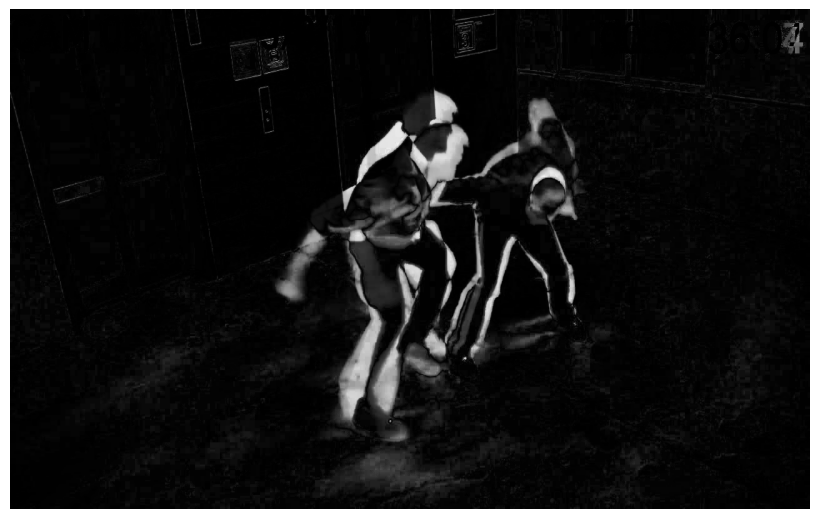

In [49]:
# show only one image without white background and axis
fig = plt.figure(frameon=False)
fig.set_size_inches(8,5)

ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(frame_diff[index], aspect='auto')
fig.savefig(f"frame_{index}.png")

(-0.5, 1279.5, 719.5, -0.5)

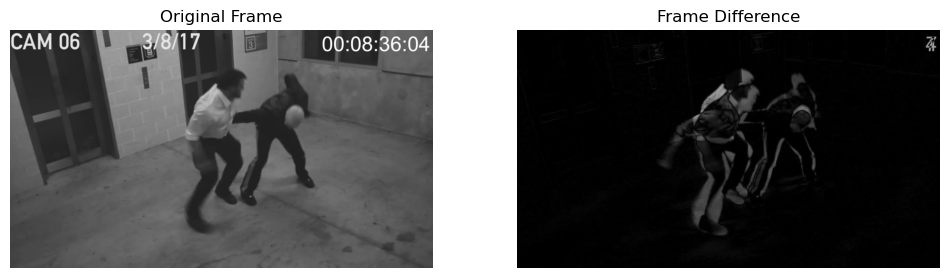

In [50]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(frames[index])
plt.title("Original Frame")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(frame_diff_without_histogram[index])
plt.title("Frame Difference")
plt.axis("off")

(-0.5, 1279.5, 719.5, -0.5)

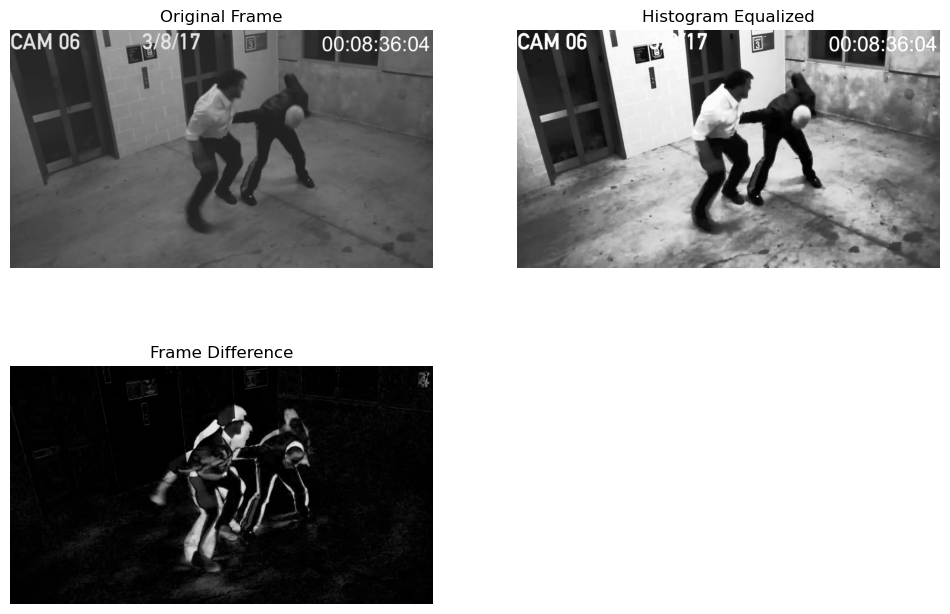

In [42]:

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(frames[index])
plt.title("Original Frame")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(hist_equalized_frames[index])
plt.title("Histogram Equalized")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(frame_diff[index])
plt.title("Frame Difference")
plt.axis("off")

(-0.5, 1279.5, 719.5, -0.5)

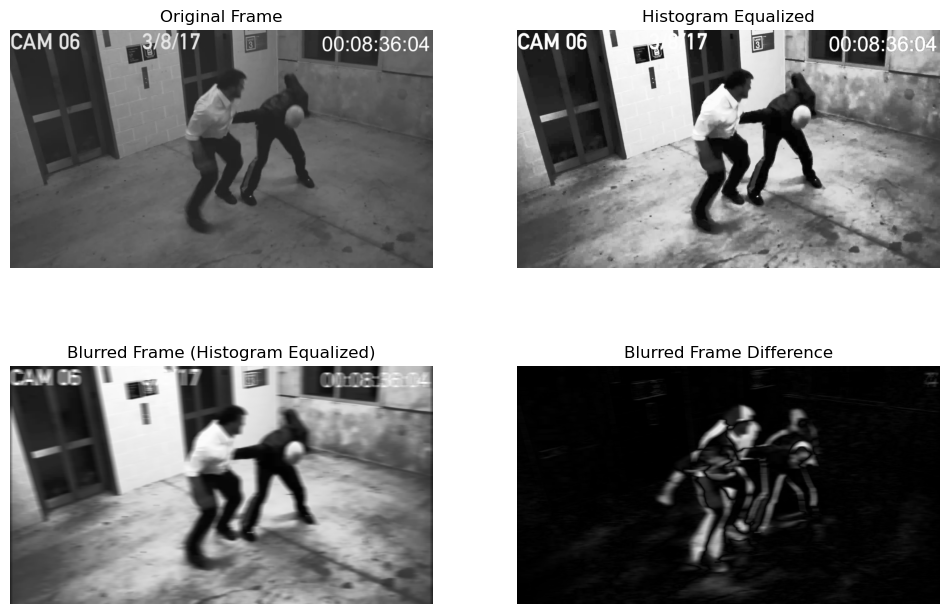

In [44]:
plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
plt.imshow(frames[index])
plt.title("Original Frame")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(hist_equalized_frames[index])
plt.title("Histogram Equalized")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(blurred_frames[index])
plt.title("Blurred Frame (Histogram Equalized)")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(frame_diff_blurred[index])
plt.title("Blurred Frame Difference")
plt.axis("off")